# TS_DEEP_LEARNING_TENSORFLOW

**Time Series Deep Learning with TensorFlow**

Based on https://towardsdatascience.com/time-series-forecasting-with-lstms-using-tensorflow-2-and-keras-in-python-6ceee9c6c651

In [8]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import os
import sys
sys.path.append('..')

In [10]:
from copy import deepcopy
import datetime

In [11]:
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [12]:
import statslib as stb

In [13]:
mpl.rcParams['figure.figsize'] = (8*1.6, 8)
mpl.rcParams['axes.grid'] = False

In [14]:
figsize = (8*1.6, 8)

In [25]:
import keras

# Data

In [15]:
time = np.arange(0, 100, 0.1)
sin = np.sin(time) + np.random.normal(scale=0.5, size=len(time))

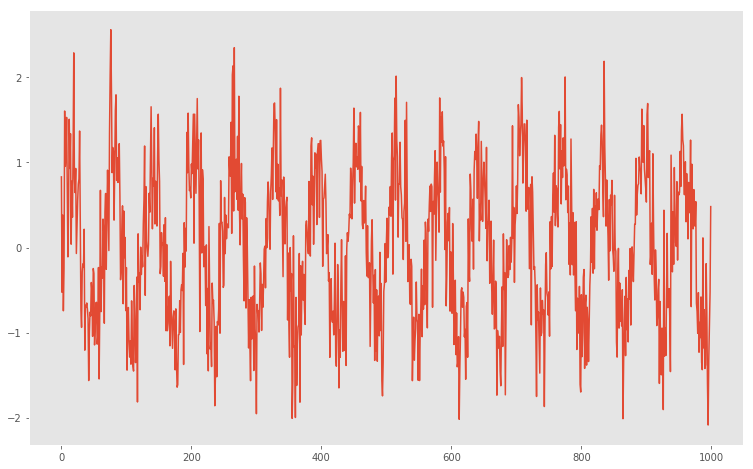

In [18]:
plt.plot(sin)

In [19]:
df = pd.DataFrame(dict(sine=sin), index=time, columns=['sine'])

train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

800 200


In [20]:

def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [21]:
time_steps = 10

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.sine, time_steps)
X_test, y_test = create_dataset(test, test.sine, time_steps)

print(X_train.shape, y_train.shape)

(790, 10, 1) (790,)


In [26]:
model = keras.Sequential()
model.add(keras.layers.LSTM(
  units=128,
  input_shape=(X_train.shape[1], X_train.shape[2])
))
model.add(keras.layers.Dense(units=1))
model.compile(
  loss='mean_squared_error',
  optimizer=keras.optimizers.Adam(0.001)
)

In [27]:
y_pred = model.predict(X_test)

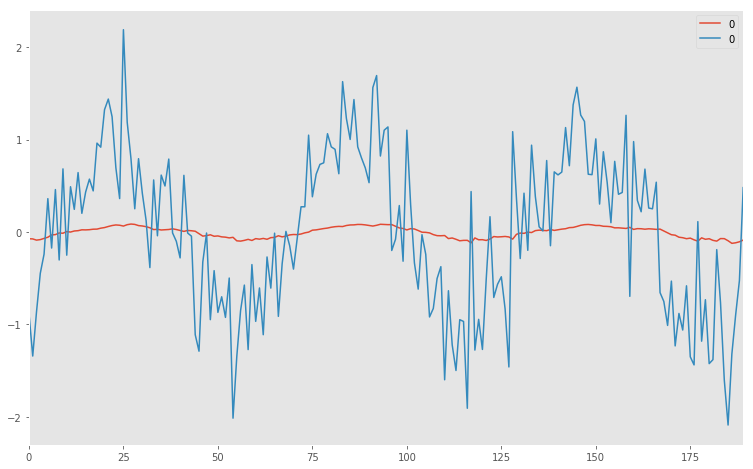

In [36]:
fig, ax = plt.subplots()
pd.DataFrame(y_pred).plot(ax=ax)
pd.DataFrame(y_test).plot(ax=ax)